# Assignment 2

## Data

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The data was taken from Kaggle. The `athlete_events` Dataset contains $271,116$ rows and $15$ columns.

**Source:**

Griffin, R, H (2018) 120 years of Olympic history: athletes and results, athlete_events, Found at: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results#athlete_events.csv

**ATTRIBUTES:**

**athlete_events.csv**

| Column Name | Data Type | Description/Notes |
|:----:|:----:|:----|
| ID |  integer | Unique number for each athlete |
| Name | string | Athlete’s name |
| Sex | string | M or F |
| Age | integer |  |
| Height | integer | In centimeters |
| Weight | integer | In kilograms |
| Team | string | Team name |
| NOC | string | National Olympic Committee, 3 letter code (Matches with `NOC` from noc_regions.csv) |
| Games | string | Year and season |
| Year | integer |  |
| Season | string | Summer or Winter |
| City | string | Host city |
| Sport | string |  |
| Event | string |  |
| Medal | string | Gold, Silver, Bronze, or NA |

Download athlete_events.csv from the link above and load it into a DataFrame called `athlete_events`:

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# Import pandas
import pandas as pd

# Read 'athlete_events.csv' into a DataFrame called athlete_events
athlete_events = pd.read_csv('/content/athlete_events.csv')

Use `info()` method on this DataFrame to get a sense of the data:

In [51]:
athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Question 1
Clearly, not every athlete receives a medal in the Olympics. How many records have a non-null value for the `Medal` field? In other words, how many medals were given according to this dataset?



Note: It is okay to double-count the medals for the team sports for the purpose of this question.

Use the `head()` method to inspect the first few rows of the data:

In [52]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [53]:
# Filter out NA values in column "Medal"
athlete_events_not_null = athlete_events[athlete_events['Medal'].notnull()]

# Count number of records with a non-null value for the Medal field
athlete_events_not_null.shape[0]


39783

## Question 2

Which of the statements below are correct, according to this dataset as of 2016?



A. "Rugby Sevens" is the latest sport that was added to the Olympic Games in 2016.

B. "Trampolining" is an existing Olympic sport and is considered the latest addition to the Olympic sports.

C.   "Weightlifting", "Cycling", "Shooting", and "Tennis" are among the very first sports in the Olympics that are still present in the games.

D.   "Football", "Fencing", "Volleyball" and "Wrestling" are among the very first sports in the Olympics that are still present in the games.

E.   "Snowboarding" is a new addition to the Winter Olympics, added in 1998.

F. "Baseball" is the latest sport that was removed from the games.

In [141]:
## "Rugby Sevens" is the latest sport that was added to the Olympic Games in 2016.

# Check if "Rugby Sevens" was available before 2016.
#rugby_sevens_before_2016 = athlete_events[(athlete_events['Sport'] == 'Rugby Sevens') & (athlete_events['Year'] < 2016)].shape[0] > 0
#print("Rugby Sevens available before 2016:", rugby_sevens_before_2016)

# Check if "Rugby Sevens" is available today (in 2016).
today = 2016
rugby_available_today = "Rugby Sevens" in athlete_events[athlete_events["Year"] == today]["Sport"].unique()
print("Rugby Sevens available today:", rugby_available_today)

# Check when it was first available.
rugby_first_year = athlete_events[athlete_events["Sport"] == "Rugby Sevens"]["Year"].min()
print("First year Rugby Sevens available:", rugby_first_year)

# Get all sports.
sports_available = set(athlete_events[athlete_events["Year"] == today]["Sport"].unique())

# Get all previously existing sports.
existing_sports = set(athlete_events[athlete_events["Year"] < today]["Sport"].unique())

# Identify sports that are new.
new_sports = sports_available - existing_sports

print("New sports in", today, ":", new_sports)

Rugby Sevens available today: True
First year Rugby Sevens available: 2016
New sports in 2016 : {'Rugby Sevens'}


In [107]:
## "Trampolining" is an existing Olympic sport and is considered the latest addition to the Olympic sports.

# Check if "Trampolining" is available today (in 2016).
today = 2016
trampolining_available = "Trampolining" in athlete_events[athlete_events["Year"] == today]["Sport"].unique()
print("Trampolining available in 2016:", trampolining_available)

# Check when it was first available.
trampolining_first_year = athlete_events[athlete_events["Sport"] == "Trampolining"]["Year"].min()
print("First year Trampolining available:", trampolining_first_year)

# Get all sports from today.
sports_available = set(athlete_events[athlete_events["Year"] == today]["Sport"].unique())

# Get all sports from before trampolining was added.
existing_sports = set(athlete_events[athlete_events["Year"] < trampolining_first_year]["Sport"].unique())

# Identify sports that were added after trampolining.
new_sports = sports_available - existing_sports
print("New sports after Trampolining was available:", new_sports)

Trampolining available in 2016: True
First year Trampolining available: 2000
New sports after Trampolining was available: {'Rugby Sevens', 'Triathlon', 'Trampolining', 'Taekwondo'}


In [117]:
## "Weightlifting", "Cycling", "Shooting", and "Tennis" are among the very first sports in the Olympics that are still present in the games.

# List sports from the first Olympics.
first_olympic_sports = athlete_events[athlete_events["Year"] == athlete_events["Year"].min()]["Sport"].unique()

# List of sports from the latest Olympics.
today = 2016
current_olympic_sports = athlete_events[athlete_events["Year"] == today]["Sport"].unique()

# Check if "Weightlifting", "Cycling", "Shooting", and "Tennis" are in both the first and current lists of sports.
sports_c = ["Weightlifting", "Cycling", "Shooting", "Tennis"]
check_c = all(sport in first_olympic_sports for sport in sports_c) and all(sport in current_olympic_sports for sport in sports_c)
print("Weightlifting, Cycling, Shooting, and Tennis are in the first and latest Olympics:", check_c)

Weightlifting, Cycling, Shooting, and Tennis are in the first and latest Olympics: True


In [118]:
## "Football", "Fencing", "Volleyball" and "Wrestling" are among the very first sports in the Olympics that are still present in the games.

# List sports from the first Olympics.
first_olympic_sports = athlete_events[athlete_events["Year"] == athlete_events["Year"].min()]["Sport"].unique()

# List of sports from the latest Olympics.
today = 2016
current_olympic_sports = athlete_events[athlete_events["Year"] == today]["Sport"].unique()

# Check if "Football", "Fencing", "Volleyball" and "Wrestling" are in both the first and current lists of sports.
sports_d = ['Football', 'Fencing', 'Volleyball', 'Wrestling']
check_d = all(sport in first_olympic_sports for sport in sports_d) and all(sport in current_olympic_sports for sport in sports_d)
print("Football, Fencing, Volleyball, and Wrestling are in the first and latest Olympics:", check_d)

Football, Fencing, Volleyball, and Wrestling are in the first and latest Olympics: False


In [140]:
## "Snowboarding" is a new addition to the Winter Olympics, added in 1998.

# Check if "Snowboarding" is available today (in 1998) in Winter.
today = 1998
snowboarding_available = "Snowboarding" in athlete_events[(athlete_events["Year"] == today) & (athlete_events["Season"] == "Winter")]["Sport"].unique()
print("Snowboarding available in Winter, in", today,":", snowboarding_available)

# Check when it was first available.
snowboarding_first_year = athlete_events[athlete_events["Sport"] == "Snowboarding"]["Year"].min()
print("First year Snowboarding available:", snowboarding_first_year)

Snowboarding available in Winter, in 1998 : True
First year Snowboarding available: 1998


In [124]:
## "Baseball" is the latest sport that was removed from the games.

# Check latest year for "Baseball".
latest_baseball_year = athlete_events[athlete_events["Sport"] == "Baseball"]["Year"].max()
print("Latest year for Baseball:", latest_baseball_year)

# Get all sports from today.
today = 2016
sports_available = set(athlete_events[athlete_events["Year"] == today]["Sport"].unique())

# Get all sports from last year of baseball.
sports_then = set(athlete_events[athlete_events["Year"] == latest_baseball_year]["Sport"].unique())

# Identify sports that were removed after baseball.
removed_sports = sports_then - sports_available
print("Sports removed after Baseball:", removed_sports)

Latest year for Baseball: 2008
Sports removed after Baseball: {'Baseball', 'Softball'}


## Question 3

True or False?

> The average age of female athletes who attended the Olympic games after 1990 has risen compared to the era before.

Note: Possible double counting is okay to answer this question. (This means if an athlete has attended more than one event each year, it's okay to have her counted multiple times to get this average.)

In [128]:
# Find average age of female athletes in and before 1990.
average_age_1990 = athlete_events[(athlete_events['Year'] <= 1990) & (athlete_events['Sex'] == 'F')]['Age'].mean()
print(average_age_1990)

# Find average age of female athletes after 1990.
average_age_after_1990 = athlete_events[(athlete_events['Year'] > 1990) & (athlete_events['Sex'] == 'F')]['Age'].mean()
print(average_age_after_1990)

# Check if average age of female athletes after 1990 is greater than before.
average_greater = average_age_after_1990 > average_age_1990
print("Average age of female athletes after 1990 is greater than before:", average_greater)

22.0290214609175
24.62131696199413
Average age of female athletes after 1990 is greater than before: True


## Question 4

How many Gold medals were given to men from 1970 to 2000 (including both years)?


Note: It is okay to double-count the medals for the team sports for the purpose of this question.

In [129]:
# Find the number of Gold medals given to men from 1970 to 2000 (inclusive)
gold_medals_men = athlete_events[(athlete_events['Sex'] == 'M') & (athlete_events['Year'] >= 1970) & (athlete_events['Year'] <= 2000) & (athlete_events['Medal'] == 'Gold')].shape[0]
print("The number of Gold medals given to men from 1970 to 2000 is:", gold_medals_men)

The number of Gold medals given to men from 1970 to 2000 is: 3207


## Question 5

Can you help us identify how many athletes attended the Olympic Games in 2016? We are trying to identify the hotels that could have handled such numbers.



Note 1: You can use the method `.unique()` on any pandas Series to get the unique values. Any column subset of a DataFrame returns a Series object.



Note 2: Watch out for athletes with similar names.

In [157]:
# Get all athletes (by individual ID) from today.
today = 2016
athletes_participating = set(athlete_events[athlete_events["Year"] == today]["ID"].unique())

# Count how many participating athletes there are.
num_unique_athletes_participating = len(athletes_participating)
print("Number of unique athletes participating in", today, ":", num_unique_athletes_participating)


Number of unique athletes participating in 2016 : 11179


## Question 6

Who won the event "Swimming Men's 100 metres Breaststroke" in 2004? Please note that in the Event description, "metres" is spelled in British!

In [142]:
# Find winner of "Swimming Men's 100 metres Breaststroke" in 2004.
winner_2004 = athlete_events[(athlete_events['Year'] == 2004) & (athlete_events['Event'] == "Swimming Men's 100 metres Breaststroke") & (athlete_events['Medal'] == 'Gold')]
winner_name = winner_2004['Name'].unique()
print(winner_name)

['Kosuke Kitajima']


## Question 7

In which city were the maximum number of games played?

Note: `.value_counts()` function returns an object counts of unique values in a column of a Pandas Dataframe.



In [146]:
# Count the number of times each city is listed.
city_count = athlete_events['City'].value_counts()

# Find the city with the maximum number.
max_games_city = city_count.idxmax()
print("The city with the maximum number of games is:", max_games_city)

The city with the maximum number of games is: London


## Question 8

For the city where the maximum number of games were played, find the number of female player(s) whose age is greater than the average age of all the players.

Hint: The function `len()` gives the length of an object.

In [147]:
# Calculate the average age of all players
average_age_all_players = athlete_events['Age'].mean()

# Filter the dataframe for female players in the city with the maximum number of games
female_players_in_city = athlete_events[(athlete_events['Sex'] == 'F') & (athlete_events['City'] == max_games_city)]

# Find the number of female players whose age is greater than the average age of all players
older_female_players_count = len(female_players_in_city[female_players_in_city['Age'] > average_age_all_players])

print("Number of female players in", max_games_city, "that are older than the average age of all players:", older_female_players_count)

Number of female players in London that are older than the average age of all players: 2682


## Question 9

Make a new column in the dataframe title `BMI` by utilizing the columns `Height` and `Weight`. Impute the missing values in the `Height` and `Weight` columns by the average of the rest of the values in the respective column. Round the values in the `BMI` column to 1 decimal place.

Note that $BMI=\frac{(Weight_{kg})}{Height_m^2}$.

In [148]:
# Calculate the mean of 'Height' and 'Weight'.
mean_height = athlete_events['Height'].mean()
mean_weight = athlete_events['Weight'].mean()

# Impute the missing values in the Height and Weight columns with the mean values.
athlete_events['Height'].fillna(mean_height, inplace=True)
athlete_events['Weight'].fillna(mean_weight, inplace=True)

# Calculate and create a new column for BMI. Note conversion of height from cm to m for BMI calculation.
athlete_events['BMI'] = (athlete_events['Weight'] / ((athlete_events['Height'] / 100) ** 2)).round(1)
athlete_events[['Height', 'Weight', 'BMI']].head()

,Height,Weight,BMI
0,180.00000,80.000000,24.7
1,170.00000,60.000000,20.8
2,175.33897,70.702393,23.0
3,175.33897,70.702393,23.0
4,185.00000,82.000000,24.0


## Question 10

Using a line plot, show the trend of athlete participation over the years. (your graph doesn't have to look exactly like the one below but it's there for your reference)



Hint 1: Use groupby('Year').size() to calculate the size/count of each year and store it in athlete_count_per_year.



Hint 2: Use .reset_index() to reset the index to each Year's count.

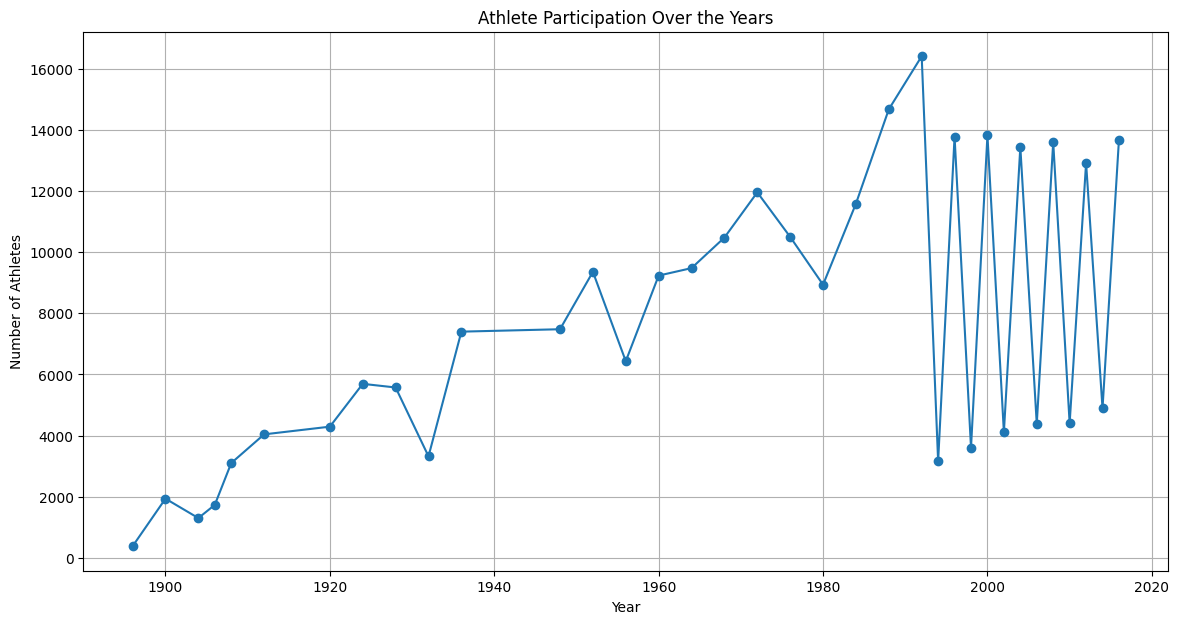

In [152]:
import matplotlib.pyplot as plt

# Group by 'Year' and calculate the count of athletes per year
athlete_count_per_year = athlete_events.groupby('Year').size().reset_index(name='Count')

# Plot the trend of athlete participation over the years
plt.figure(figsize=(14,7))
plt.plot(athlete_count_per_year['Year'], athlete_count_per_year['Count'], marker='o')
plt.title('Athlete Participation Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

In [159]:
# Create new list names of the players.
even_age_list = [name for name, age, sport, city in zip(athlete_events['Name'], athlete_events['Age'], athlete_events['Sport'], athlete_events['City'])
                 if age % 2 == 0 and sport == 'Ski Jumping' and city == 'Oslo']